<a href="https://colab.research.google.com/github/emilyjiminroh/2022_ai_winter_study/blob/main/RNN/%5BRNN%5D%EB%A1%9C%EC%9D%B4%ED%84%B0_%EB%89%B4%EC%8A%A4_%EC%B9%B4%ED%85%8C%EA%B3%A0%EB%A6%AC_%EB%B6%84%EC%84%9D%ED%95%98%EA%B8%B0_with_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q tensorflow-gpu==1.15.0
%tensorflow_version 1.x
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy
import os

     |████████████████████████████████| 411.5 MB 8.6 kB/s 
     |████████████████████████████████| 3.8 MB 40.1 MB/s 
     |████████████████████████████████| 50 kB 6.0 MB/s 
     |████████████████████████████████| 503 kB 43.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
tensorflow 2.8.0 requires tensorboard<2.9,>=2.8, but you have tensorboard 1.15.0 which is incompatible.
tensorflow-probability 0.15.0 requires gast>=0.3.2, but you have gast 0.2.2 which is incompatible.
TensorFlow 1.x selected.


In [2]:
# 로이터 뉴스 데이터셋 불러오기
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.compat.v1.set_random_seed(3)

In [4]:
# 불러온 데이터를 학습셋, 테스트셋으로 나누기
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

2113536/2110848 [==============================] - 0s 0us/step


/tensorflow-1.15.2/python3.7/keras/datasets/reuters.py:85: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/tensorflow-1.15.2/python3.7/keras/datasets/reuters.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [5]:
# 데이터 확인하기
category = numpy.max(Y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [6]:
# 데이터 전처리
# sequence().pad_sequences() 각 기사의 단어 수가 제각각 다르므로, maxlen 만큼의 단어 수로 맞춘다. 
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)
# 원-핫 인코딩
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [7]:
# 모델의 설정
model = Sequential()
# Embedding ('불러온 단어의 총 개수','기사당 단어 수')
model.add(Embedding(1000, 100))
# LSTM('기사랑 단어 수','기타 옵션')은 RNN에서 기억 값에 대한 가중치 제어, 활성화 함수는 tanh 사용
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [8]:
# 모델의 컴파일
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

In [9]:
# 모델의 실행
history = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test, y_test))


Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 17s 2ms/step - loss: 2.5576 - accuracy: 0.3717 - val_loss: 2.0103 - val_accuracy: 0.4920
Epoch 2/20
8982/8982 [==============================] - 9s 1ms/step - loss: 2.0733 - accuracy: 0.4555 - val_loss: 2.2589 - val_accuracy: 0.2484
Epoch 3/20
8982/8982 [==============================] - 9s 1ms/step - loss: 1.9007 - accuracy: 0.4845 - val_loss: 1.8029 - val_accuracy: 0.5321
Epoch 4/20
8982/8982 [==============================] - 9s 1ms/step - loss: 1.7386 - accuracy: 0.5405 - val_loss: 1.7258 - val_accuracy: 0.5583
Epoch 5/20
8982/8982 [==============================] - 9s 1ms/step - loss: 1.6516 - accuracy: 0.5684 - val_loss: 1.6553 - val_accuracy: 0.5971
Epoch 6/20
8982/8982 [==============================] - 9s 1ms/step - loss: 1.5978 - accuracy: 0.5925 - val_loss: 1.5970 - val_accuracy: 0.6015
Epoch 7/20
8982/8982 [==============================] - 9s 1ms/step - loss: 1.4752 - a

In [10]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

2246/2246 [==============================] - 1s 614us/step

 Test Accuracy: 0.7035


In [11]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

In [12]:
# 학습셋의 오차
y_loss = history.history['loss']

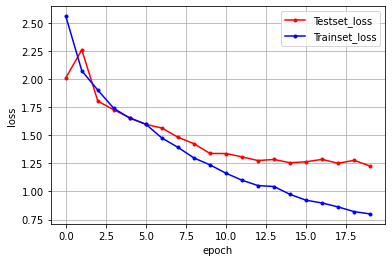

In [15]:
# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()